In [1]:
import stagem1.temporal_integration as sti
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
x=sti.SetUp()
ae2=x['adv']**2
ve=x['v']

x.update_model(intmethod=sti.Runge_Kutta2)
ark22=x['adv']**2
vrk2=x['v']

x.update_model(intmethod=sti.Runge_Kutta4)
ark42=x['adv']**2
vrk4=x['v']

x_ref=sti.SetUp(time= list(np.arange(0,sti.d2s*4, sti.h2s/6)))#10 min step
x_ref.update_model(intmethod=sti.Runge_Kutta4)
ark42_ref=x_ref['adv']**2
v_ref=x_ref['v']

a2=xr.concat([ae2, ark22, ark42, ark42_ref], pd.Index(["Euler", "RK2", "RK4", "Reference"], name="int_method"))
a2.name='square advancement'
a2=a2.to_dataset(name='square_adv')

a2['square_adv_km']=a2.square_adv/1000000
a2.square_adv_km.attrs={"units":"km²", "long_name":"Square advancement"}
a2['velocities']=xr.concat([ve, vrk2, vrk4, v_ref], pd.Index(["Euler", "RK2", "RK4", "Reference"], name="int_method"))

a2

<xarray.Dataset>
Dimensions:        (a: 100, int_method: 4, otime: 96)
Coordinates:
  * a              (a) float64 0.0 2.02e+03 4.04e+03 ... 1.96e+05 1.98e+05 2e+05
  * otime          (otime) int64 0 3600 7200 10800 ... 334800 338400 342000
    otime_day      (otime) float64 0.0 0.04167 0.08333 ... 3.875 3.917 3.958
  * int_method     (int_method) object 'Euler' 'RK2' 'RK4' 'Reference'
Data variables:
    square_adv     (int_method, otime, a) float64 0.0 0.0 ... 1.195e+09
    square_adv_km  (int_method, otime, a) float64 0.0 0.0 ... 1.195e+03
    velocities     (int_method, otime, a) float64 0.2 0.1992 ... 0.1913 0.1854

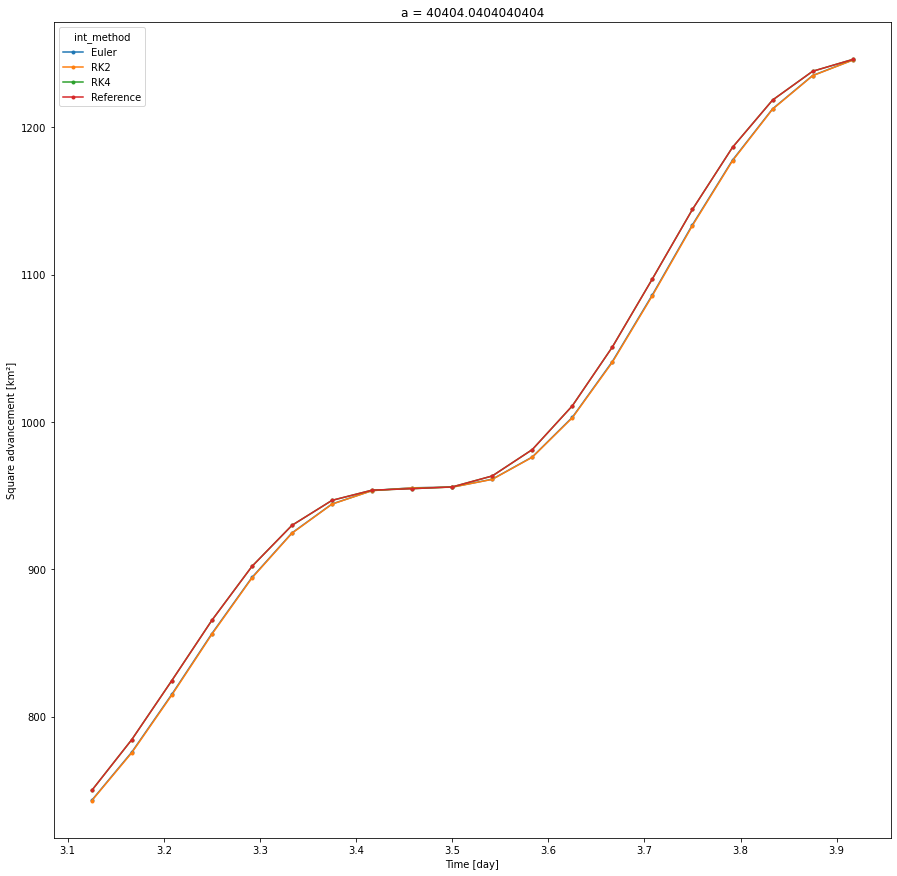

In [3]:
traj=20 #to choose the particule
a2.square_adv_km.isel(a=traj, otime=sti.np.arange(75,95)).plot(x="otime_day", marker='.', figsize=(15,15), hue="int_method" )

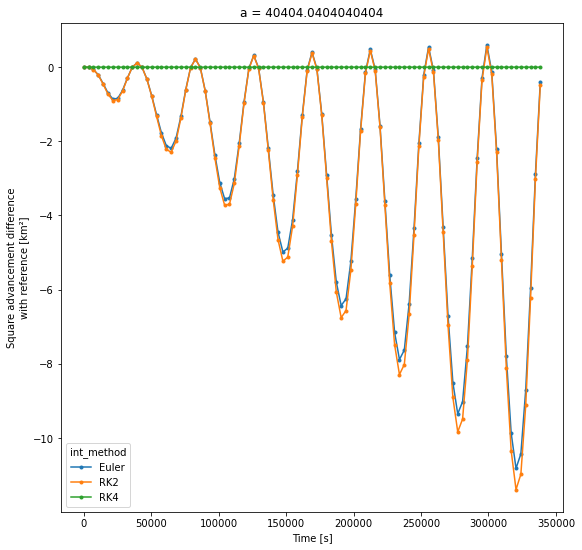

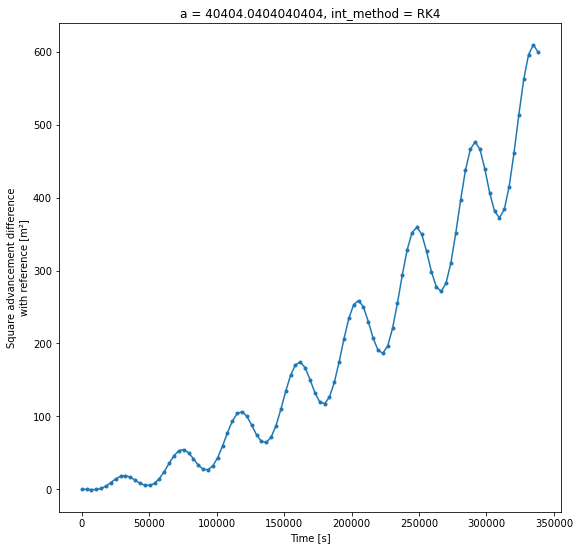

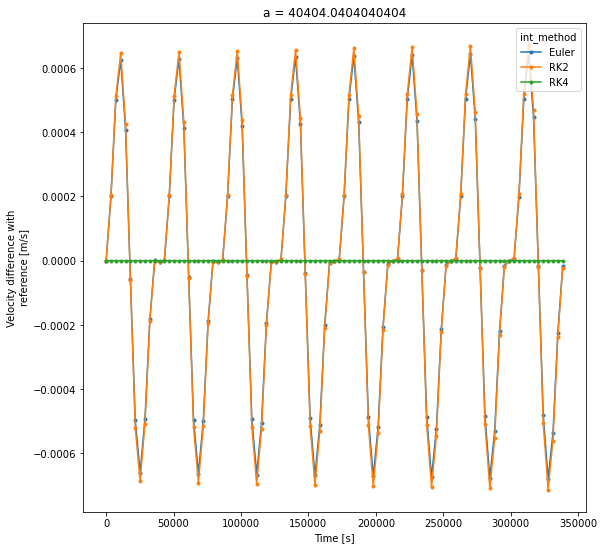

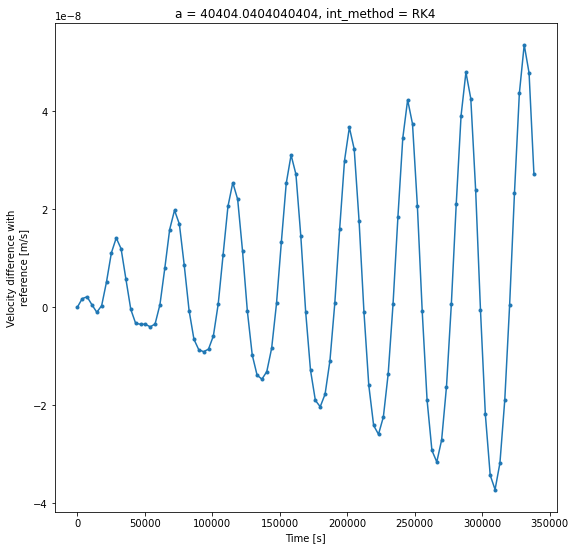

In [9]:
aref=a2.sel(int_method='Reference')

Aref=xr.concat([aref, aref, aref, aref], pd.Index(["Euler", "RK2", "RK4", "Reference"], name="int_method"))

a2['diff_sqr_adv']=a2.square_adv-Aref.square_adv
a2.diff_sqr_adv.attrs={"units":"m²", "long_name":"Square advancement difference with reference"}

a2['diff_sqr_adv_km']=a2.square_adv_km-Aref.square_adv_km
a2.diff_sqr_adv_km.attrs={"units":"km²", "long_name":"Square advancement difference with reference"}

a2['diff_velocities']=a2.velocities-Aref.velocities
a2.diff_velocities.attrs={"units":"m/s", "long_name":"Velocity difference with reference"}


a2.diff_sqr_adv_km.isel(a=traj, otime=sti.np.arange(0,95), int_method=[0,1,2]).plot(marker='.',hue="int_method", figsize=(9,9))
a2.diff_sqr_adv.isel(a=traj, otime=sti.np.arange(0,95), int_method=2).plot(marker='.',hue="int_method", figsize=(9,9))
a2.diff_velocities.isel(a=traj, otime=sti.np.arange(0,95), int_method=[0,1,2]).plot(marker='.',hue="int_method", figsize=(9,9))
a2.diff_velocities.isel(a=traj, otime=sti.np.arange(0,95), int_method=2).plot(marker='.',hue="int_method", figsize=(9,9))

In [ ]:
class Temp_Int_Comp:
    